In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

In [2]:
DataFrame = pd.read_csv("C:/Users/Monster/Desktop/archive/gen.csv")

In [3]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
DataFrame.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


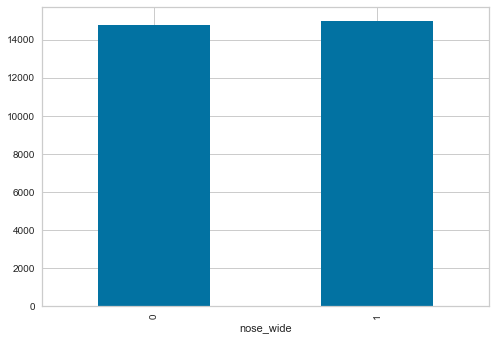

In [16]:
graph = DataFrame.groupby('nose_wide').sum().iloc[:, 2].plot(kind='bar')

<AxesSubplot:>

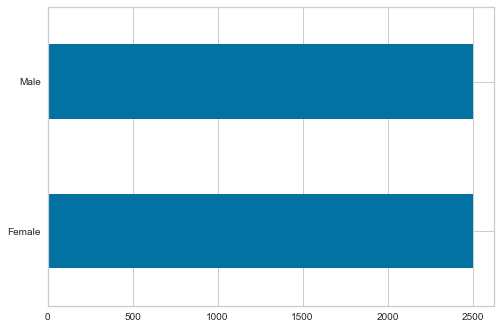

In [17]:
DataFrame.gender.value_counts().plot(kind= 'barh')

In [18]:
DataFrame.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [19]:

def label_encoder(DataFrame, column_name):
    label_encoder = preprocessing.LabelEncoder()

    DataFrame[column_name]= label_encoder.fit_transform(DataFrame[column_name])
    print(column_name)
    for i in range(len(DataFrame[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(DataFrame[column_name].value_counts())
    print('-'*10)
    
    return DataFrame[column_name], label_encoder

In [20]:
DataFrame['gender'], label_encoder_posted_by = label_encoder(DataFrame, 'gender')

gender
For 0 : ['Female']
For 1 : ['Male']
----------
0    2501
1    2500
Name: gender, dtype: int64
----------


In [21]:
X = DataFrame.iloc[:, :-1]
y = DataFrame.iloc[:, -1]

In [22]:

scaler = StandardScaler()
norm = Normalizer()

X_stand = scaler.fit_transform(X)
X_norm = norm.fit_transform(X)

In [23]:
X_stand_train, X_stand_test, y_stand_train, y_stand_test = train_test_split(X_stand, y, test_size=0.33, random_state=42)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
def modelim(name, model):
    classificationn = model.fit(X_train, y_train)
    classificationn_standardscaleolan = model.fit(X_stand_train, y_stand_train)
    classification_normalizeoolan = model.fit(X_norm_train, y_norm_train)
    y_tahminyaniyüssü = classificationn.predict(X_test)
    y_standardolanınüssü = classificationn_standardscaleolan.predict(X_stand_test)
    y_normalizeüssü = classification_normalizeoolan.predict(X_norm_test)
    print(name)
    print("Orjinali:")
    print("R2 : ",r2_score(y_test, y_tahminyaniyüssü))
    print("MSE : ",mean_squared_error(y_test, y_tahminyaniyüssü))
    print("-"*21)
    print("Yani:")
    print("R2 : ",r2_score(y_stand_test, y_standardolanınüssü))
    print("MSE : ",mean_squared_error(y_stand_test, y_standardolanınüssü))
    print("-"*7)
    print("Normalize:")
    print("R2 : ",r2_score(y_norm_test,y_normalizeüssü))
    print("MSE : ",mean_squared_error(y_norm_test, y_normalizeüssü))
    print("="*10)
    return classificationn, classificationn_standardscaleolan, classification_normalizeoolan

In [25]:

_,_, Linear = modelim("Linear Regression", LinearRegression())
_,_, Lasso = modelim("Lasso Regression", LassoCV(cv=10))
_,_, Ridge = modelim("Ridge Regression", RidgeCV((0.1, 1.0, 5.0, 10)))
_,_, ElasticNet = modelim("Elastic Net", ElasticNetCV(l1_ratio=0.5))
_,_, ElasticNet = modelim("Elastic Net", ElasticNetCV())
_,_, Gradient = modelim("Gradient", GradientBoostingRegressor())
_,_, AdaBoost = modelim("Ada", AdaBoostRegressor())

Linear Regression
Orjinali:
R2 :  -2187.787272346893
MSE :  546.9509028118532
---------------------
Yani:
R2 :  -726.9559876751647
MSE :  181.90720939239966
-------
Normalize:
R2 :  0.8072761760969694
MSE :  0.04815930301170403
Lasso Regression
Orjinali:
R2 :  -230.8950895417
MSE :  57.94771843975101
---------------------
Yani:
R2 :  -644.1466942769993
MSE :  161.21418985707777
-------
Normalize:
R2 :  0.8071292693828369
MSE :  0.04819601318493057
Ridge Regression
Orjinali:
R2 :  -143.77361807478994
MSE :  36.177138870348465
---------------------
Yani:
R2 :  -619.9348192629851
MSE :  155.16394136331553
-------
Normalize:
R2 :  0.8069741272350253
MSE :  0.04823478129130701
Elastic Net
Orjinali:
R2 :  -229.30212750640726
MSE :  57.54965690386946
---------------------
Yani:
R2 :  -638.6381898166271
MSE :  159.8376826351068
-------
Normalize:
R2 :  0.8070806109516857
MSE :  0.048208172325831945
Elastic Net
Orjinali:
R2 :  -229.30212750640726
MSE :  57.54965690386946
---------------------
Y